## Data Preprocessing

In [1]:
# Import the libraries
import os
import numpy as np 
import pandas as pd 
import c_visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Insurance/Insurance_2018')

In [3]:
# Import Data
Insurance = pd.read_excel('INSURANCE_2018_20200331_V1.xlsx')

# Create Product_sub_Category 
Insurance['Product_sub_Category'] = Insurance['Insure_Company'] + '_' + Insurance['Product_Category']

# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Insurance_flat = Insurance.groupby(['Customer_ID','Product_Category'])['Buy_Amount'].sum().unstack()
Insurance_flat['Buy_Amount'] = Insurance.groupby(['Customer_ID'])['Buy_Amount'].sum()
Insurance_flat['Age'] = Insurance.groupby(['Customer_ID'])['Age'].first()
Insurance_flat['Gender'] = Insurance.groupby(['Customer_ID'])['Gender'].first()
Insurance_flat.fillna(value=1, inplace=True)

# Age bin
Insurance_flat['Age_bins'] = pd.cut(x=Insurance_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Insurance_flat.head()

Product_Category,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age,Gender,Age_bins
Customer_ID,,,,,,,,,,,,,,,
A103717610,1.0,1.0,1.0,1.0,1.0,1.0,9840.0,1.0,1.0,1.0,1.0,9840,66,MALE,60-69
A120502113,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,29720.0,29720,46,MALE,40-49
A121900382,1.0,1.0,1.0,1.0,10000.0,1.0,1.0,1.0,1.0,1.0,1.0,10000,50,MALE,40-49
A122597969,1.0,1.0,1.0,1.0,1.0,1.0,4536.0,1.0,1.0,1.0,1.0,4536,61,MALE,60-69
A122755416,1.0,1.0,1.0,1.0,1000000.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000,55,MALE,50-59


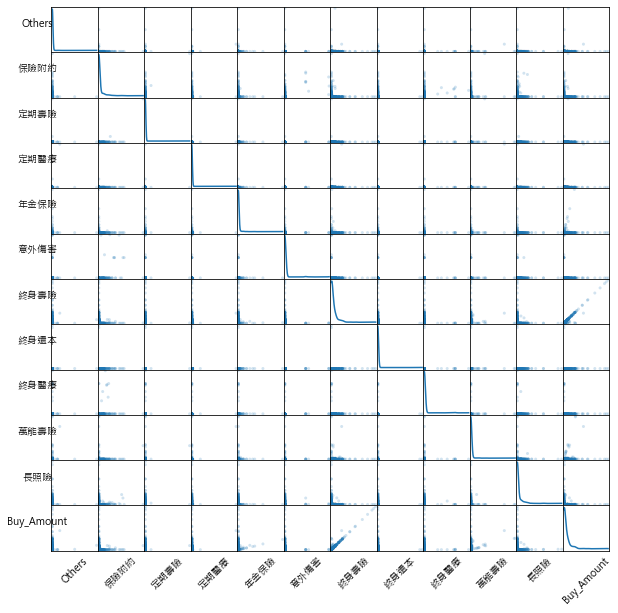

In [9]:
# Scatter_matrix plot of all features
Insurance_flat_numeric = Insurance_flat.iloc[:,:-2]
sm = pd.plotting.scatter_matrix(Insurance_flat_numeric, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Insurance_2018_Var.png')

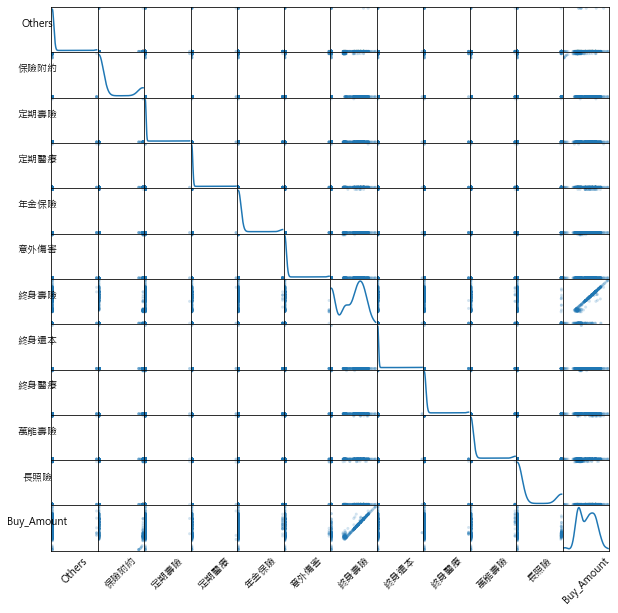

In [10]:
# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Insurance_scaled_features = bc.fit_transform(Insurance_flat_numeric.values)
Insurance_scaled_features_df = pd.DataFrame(Insurance_scaled_features, index=Insurance_flat_numeric.index,\
                                         columns=Insurance_flat_numeric.columns)
sm = pd.plotting.scatter_matrix(Insurance_scaled_features_df, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Insurance_2018_Var_Norm_2.png')

In [9]:
# Gender_df 
Gender_df = Insurance_flat.groupby('Gender').size().to_frame(name = 'Size')
Gender_df['Buy_Amount'] = Insurance_flat.groupby('Gender')['Buy_Amount'].sum()
Gender_df['Buy_Amount'] = Gender_df['Buy_Amount'].apply(lambda x: round(x, 0))
Gender_df

,Size,Buy_Amount
Gender,,
FEMALE,329,178604137
MALE,209,154225624


In [11]:
# Age df
Age_df = Insurance_flat.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df['Buy_Amount'] = Insurance_flat.groupby('Age_bins')['Buy_Amount'].sum()
Age_df

,Size,Buy_Amount
Age_bins,,
0-19,43,6549977
20-39,129,43568608
40-49,158,79275122
50-59,136,153680824
60-69,54,43023045
70+,18,6732185


Text(0.5, 1.0, 'Insurance_2018_Age_distribution')

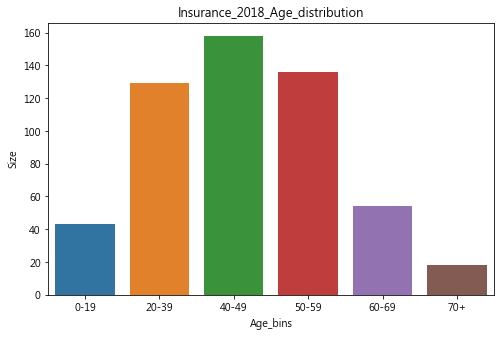

In [12]:
# Plot age distribution
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index,y = Age_df['Size'])
plt.title('Insurance_2018_Age_distribution')

Text(0.5, 1.0, 'Insurance_2018_Age_buy_amount')

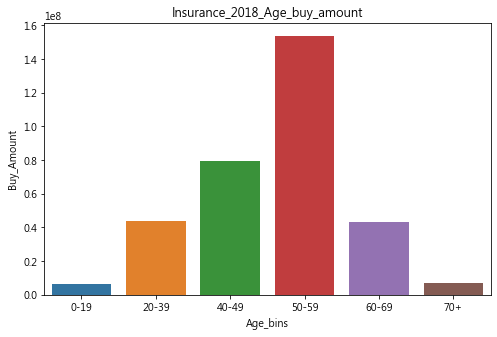

In [13]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount)
plt.title('Insurance_2018_Age_buy_amount')

Text(0.5, 1.0, 'Insurance_2018_Age_Average_buy_amount')

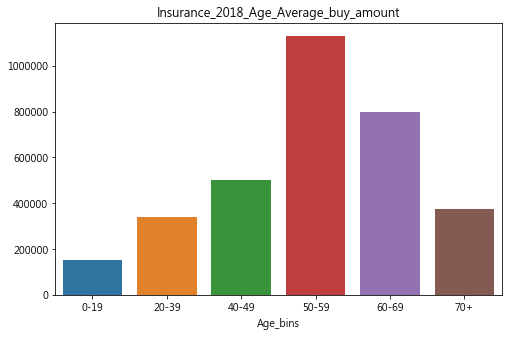

In [14]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount / Age_df.Size)
plt.title('Insurance_2018_Age_Average_buy_amount')

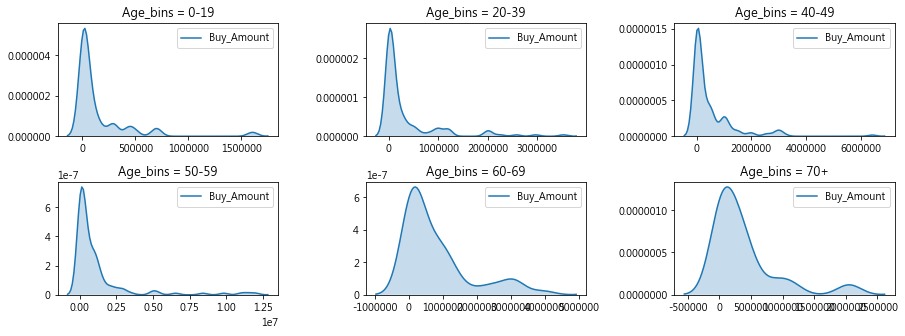

In [6]:
# Age bin kde plot
fig , ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,j in enumerate(np.sort(Insurance_flat.Age_bins.unique())):
    plt.subplot(2, 3, i+1)
    filter_ = Insurance_flat['Age_bins'] == j
    sns.kdeplot(Insurance_flat.loc[filter_].Buy_Amount, shade=True)
    plt.title("Age_bins = {}" .format(j))

## Outlier Detection

In [18]:
# Outlier detection
import xlsxwriter

# Create a new df with the descriptive features
Insurance_feat_w_prop_df = Insurance_flat_numeric
# Insurance_feat_w_prop_df['Customer_Name'] = Insurance.groupby(['Customer_ID'])['Customer_Name'].first()
Insurance_feat_w_prop_df['Age'] = Insurance.groupby(['Customer_ID'])['Age'].first()
Insurance_feat_w_prop_df['Gender'] = Insurance.groupby(['Customer_ID'])['Gender'].first()
Insurance_feat_w_prop_df['Constellation'] = Insurance.groupby(['Customer_ID'])['Constellation'].first()
Insurance_feat_w_prop_df['Buy_Amount'] = Insurance.groupby(['Customer_ID'])['Buy_Amount'].sum()
Insurance_feat_w_prop_df['Com_ID'] = Insurance.groupby(['Customer_ID'])['Com_ID'].first()
Insurance_feat_w_prop_df['Sales_ID'] = Insurance.groupby(['Customer_ID'])['Com_ID'].first()
Insurance_feat_w_prop_df['Sales_Name'] = Insurance.groupby(['Customer_ID'])['Com_ID'].first()

feature_outliers = []
writer = pd.ExcelWriter('Insurance_2018_Outliers_sheets.xlsx', engine='xlsxwriter')

for feature in Insurance_scaled_features_df.keys():
    Q1 = np.percentile(Insurance_scaled_features_df[feature], 25)
    Q3 = np.percentile(Insurance_scaled_features_df[feature], 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((Insurance_scaled_features_df[feature] >= Q1 - step)&\
                       (Insurance_scaled_features_df[feature] <= Q3 + step))
    Insurance_feat_w_prop_df.loc[Insurance_scaled_features_df.loc[Outlier_Index].index,:].groupby(['Customer_ID']).first()\
    .to_excel(writer, sheet_name = feature)
    feature_outliers.append(Insurance_feat_w_prop_df.loc[Insurance_scaled_features_df.loc[Outlier_Index].index,:])
writer.save()

# Flatten list of outliers
outliers_flattened = []

for i, j in enumerate(feature_outliers):
    outliers_flattened.append(feature_outliers[i].index)
flat_list = [item for sublist in outliers_flattened for item in sublist]

# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(flat_list)
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 3]
Insurance_feat_w_prop_df.loc[Insurance_scaled_features_df.loc[outliers].index,:].groupby(['Customer_ID']).first()\
.to_csv('Insurance_2018_Outliers.csv', encoding='utf_8_sig')

In [6]:
# Drop the outliers
Insurance_flat = Insurance_flat.drop(['A231478862', 'B125115362', 'D224702123'])

In [7]:
# Rescale data
Insurance_flat_numeric = Insurance_flat.iloc[:,:-2]
bc = PowerTransformer(method='box-cox')
Insurance_scaled_features = bc.fit_transform(Insurance_flat_numeric.values)
Insurance_scaled_features_df = pd.DataFrame(Insurance_scaled_features, index=Insurance_flat_numeric.index,\
                                         columns=Insurance_flat_numeric.columns)

## PCA vs. SVD

,Explained Var,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age
Dim 1,0.1896,0.0069,0.3675,0.0506,0.0145,-0.0260,0.1357,-0.5493,0.0542,0.1567,-0.0558,0.3296,-0.5670,-0.2838
Dim 2,0.1130,-0.1514,0.4840,0.0176,-0.1979,-0.1519,0.3699,0.3273,0.0159,0.2348,-0.1861,-0.4837,0.0557,-0.3304
Dim 3,0.0983,0.5519,0.1283,0.2373,0.5634,-0.0878,0.0987,0.0002,0.0038,0.0525,0.4645,-0.2183,0.0617,-0.1329
Dim 4,0.0875,-0.3494,0.1632,0.6454,-0.2754,0.2237,-0.0136,-0.0950,-0.2052,0.0597,0.4544,-0.0220,0.0667,0.2064
Dim 5,0.0822,-0.0927,-0.0398,0.2644,-0.0037,-0.8360,0.0803,0.1759,-0.1495,-0.2383,-0.0035,0.3230,-0.0084,0.0002
Dim 6,0.0795,-0.1155,-0.1077,0.1862,-0.1178,-0.0211,-0.0230,-0.0103,0.8781,-0.2768,0.1517,-0.0386,0.0323,-0.2287
Dim 7,0.0780,0.0175,0.0153,-0.0433,0.0316,0.2825,0.6392,-0.0237,-0.1688,-0.6906,-0.0212,0.0397,-0.0157,0.0078
Dim 8,0.0664,0.3602,0.0944,0.5463,-0.0477,0.1705,-0.3241,0.0842,-0.0581,-0.2290,-0.5915,-0.0606,-0.0593,-0.0805
Dim 9,0.0610,-0.4728,-0.0171,0.2176,0.6845,0.1362,0.1660,0.0865,0.1368,0.1961,-0.3156,0.1634,0.1104,0.1051
Dim 10,0.0593,0.3895,-0.0728,0.1436,-0.2440,-0.0524,0.4736,-0.0664,0.2681,0.3590,-0.1692,0.1551,0.1189,0.5135


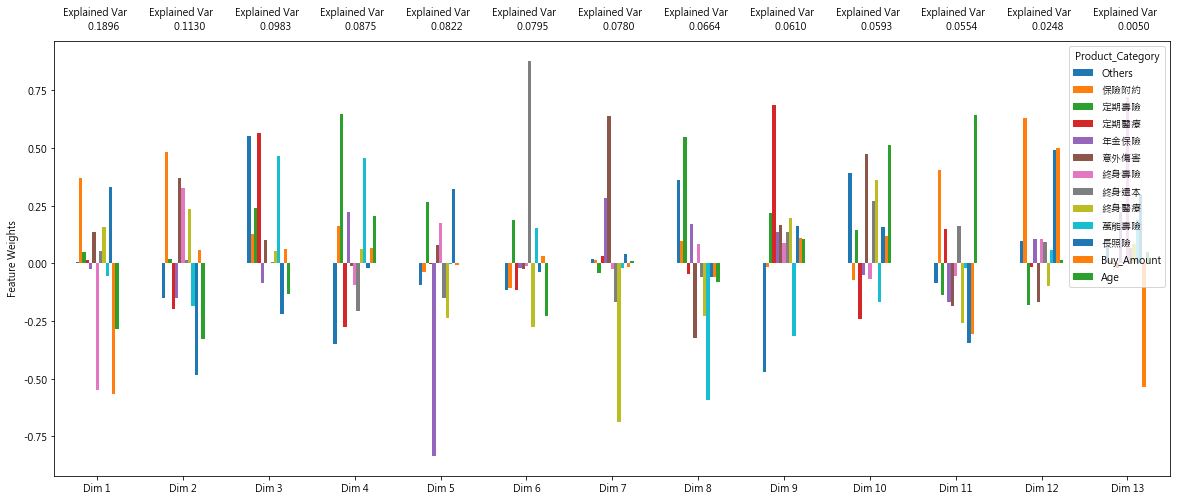

In [10]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Insurance_scaled_features_df.shape[1]
pca = PCA(n_components = num_features, random_state = 0)
pca = pca.fit(Insurance_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Insurance_scaled_features_df, pca)

,Explained Var,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age
Dim 1,0.1896,0.0069,0.3675,0.0506,0.0145,-0.0260,0.1357,-0.5493,0.0542,0.1567,-0.0558,0.3296,-0.5670,-0.2838
Dim 2,0.1130,-0.1514,0.4840,0.0176,-0.1979,-0.1519,0.3699,0.3273,0.0159,0.2348,-0.1861,-0.4837,0.0557,-0.3304
Dim 3,0.0983,0.5519,0.1283,0.2373,0.5634,-0.0878,0.0987,0.0002,0.0038,0.0525,0.4645,-0.2183,0.0617,-0.1329
Dim 4,0.0875,-0.3494,0.1632,0.6454,-0.2754,0.2237,-0.0136,-0.0950,-0.2052,0.0597,0.4544,-0.0220,0.0667,0.2064
Dim 5,0.0822,-0.0927,-0.0398,0.2644,-0.0037,-0.8360,0.0803,0.1759,-0.1495,-0.2383,-0.0035,0.3230,-0.0084,0.0002
Dim 6,0.0795,-0.1155,-0.1077,0.1862,-0.1178,-0.0211,-0.0230,-0.0103,0.8781,-0.2768,0.1517,-0.0386,0.0323,-0.2287
Dim 7,0.0780,0.0175,0.0153,-0.0433,0.0316,0.2825,0.6392,-0.0237,-0.1688,-0.6906,-0.0212,0.0397,-0.0157,0.0078
Dim 8,0.0664,0.3602,0.0944,0.5463,-0.0477,0.1705,-0.3241,0.0842,-0.0581,-0.2290,-0.5915,-0.0606,-0.0593,-0.0805
Dim 9,0.0610,-0.4728,-0.0171,0.2176,0.6845,0.1362,0.1660,0.0865,0.1368,0.1961,-0.3156,0.1634,0.1104,0.1051
Dim 10,0.0593,0.3895,-0.0728,0.1436,-0.2440,-0.0524,0.4736,-0.0664,0.2681,0.3590,-0.1692,0.1551,0.1189,0.5135


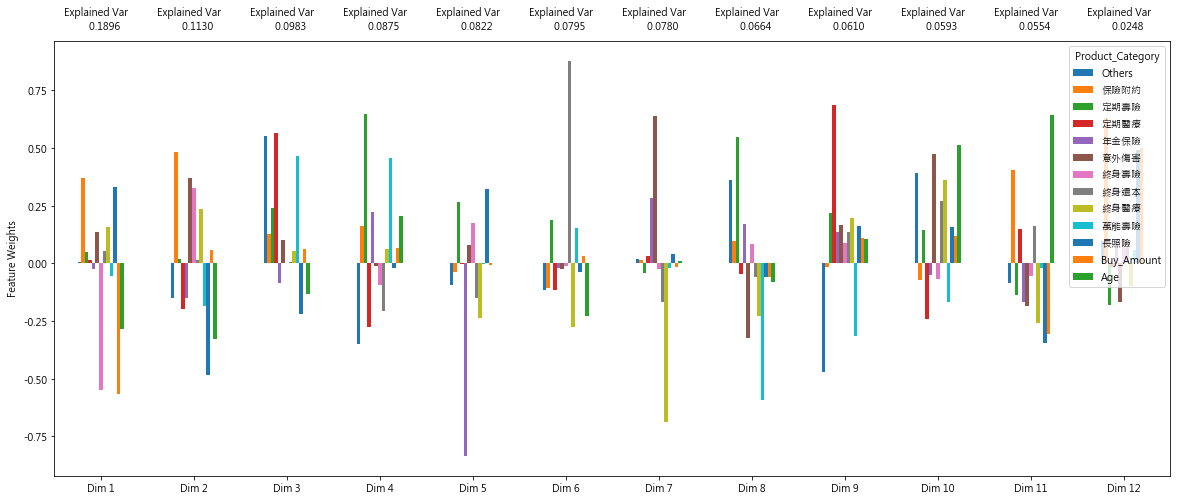

In [12]:
# SVD
from sklearn.decomposition import TruncatedSVD

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Insurance_scaled_features_df.shape[1] - 1
svd = TruncatedSVD(n_components = num_features, random_state = 0)
svd = svd.fit(Insurance_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Insurance_scaled_features_df, svd)

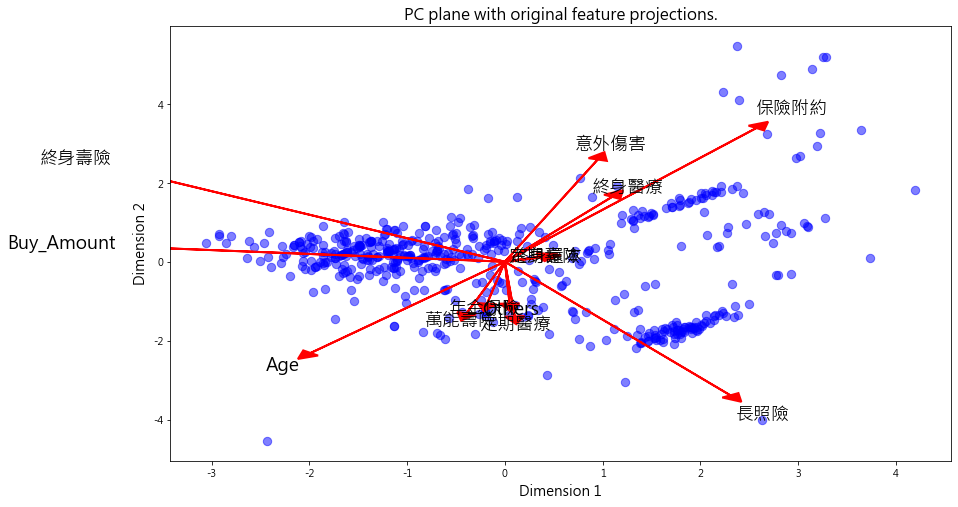

In [11]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Insurance_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Insurance_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

vs.biplot(Insurance_scaled_features_df ,reduced_data, pca)

## K means Clustering

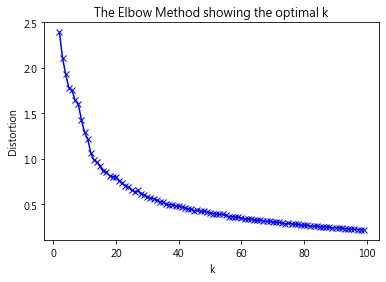

In [8]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(2,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Insurance_scaled_features_df)
    distortions.append(sum(np.min(cdist(Insurance_scaled_features_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / \
                       Insurance_scaled_features_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

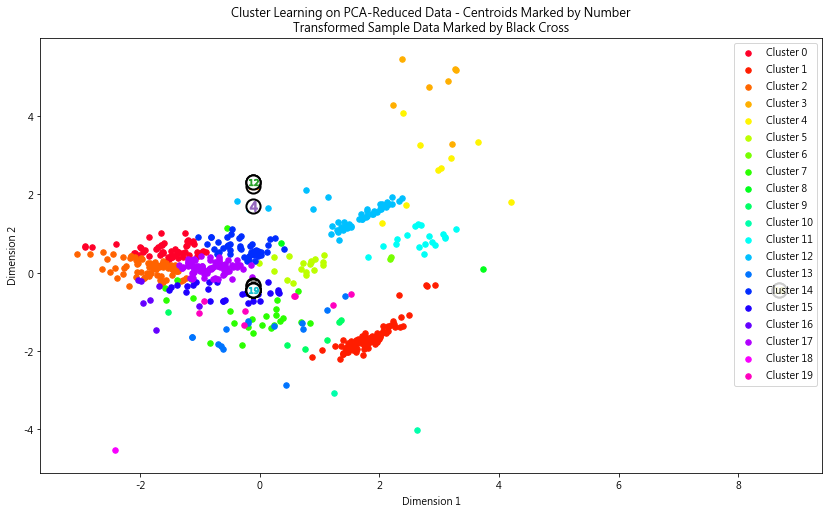

In [13]:
# Clustering(Elbow_method)
optimized_kmeans = KMeans(n_clusters = 20, random_state = 0).fit(Insurance_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Insurance_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

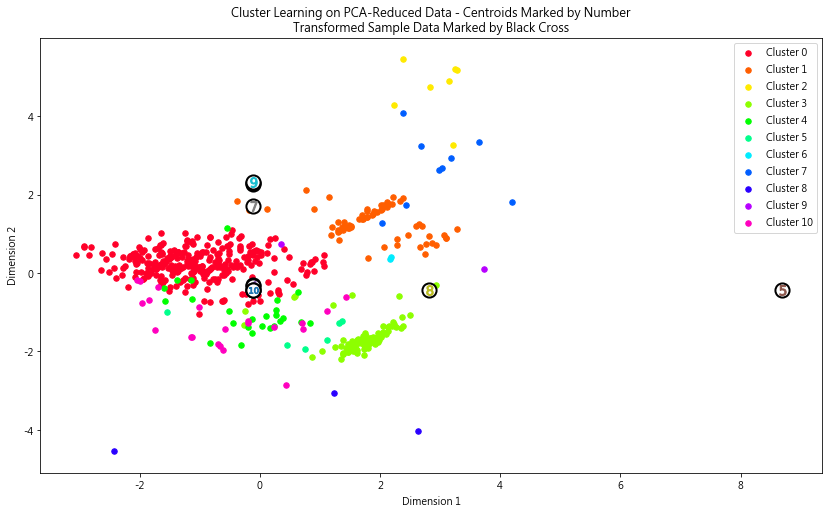

In [14]:
# Clustering(silhouette_score method)
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Insurance_scaled_features_df)
    preds = kmeans.predict(Insurance_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Insurance_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

optimized_kmeans = KMeans(n_clusters = best_size, random_state = 0).fit(Insurance_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Insurance_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

For n_clusters = 2 The average silhouette_score is : 0.3866041812632863
For n_clusters = 3 The average silhouette_score is : 0.3687642242548296
For n_clusters = 4 The average silhouette_score is : 0.42266285843385776
For n_clusters = 5 The average silhouette_score is : 0.47408441670241197
For n_clusters = 6 The average silhouette_score is : 0.4877120044138809
For n_clusters = 7 The average silhouette_score is : 0.4475275178650715
For n_clusters = 8 The average silhouette_score is : 0.5048764411800224
For n_clusters = 9 The average silhouette_score is : 0.5445936364020425
For n_clusters = 10 The average silhouette_score is : 0.5656981368200538
For n_clusters = 11 The average silhouette_score is : 0.4492028841475994


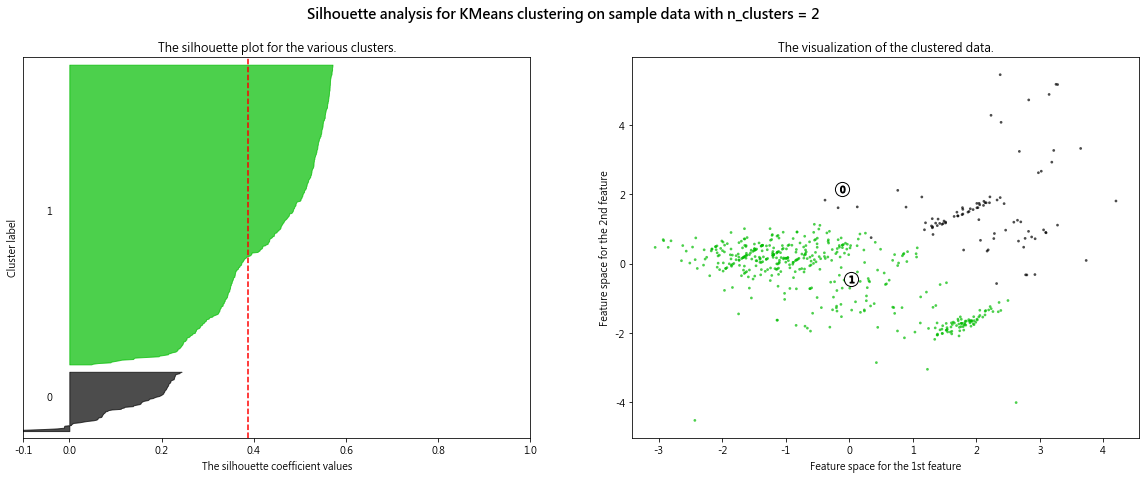

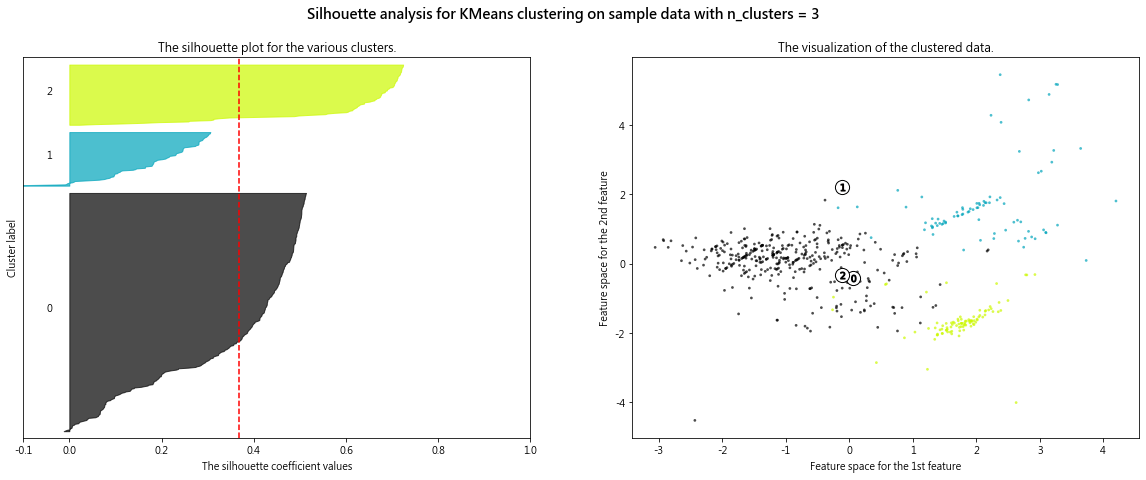

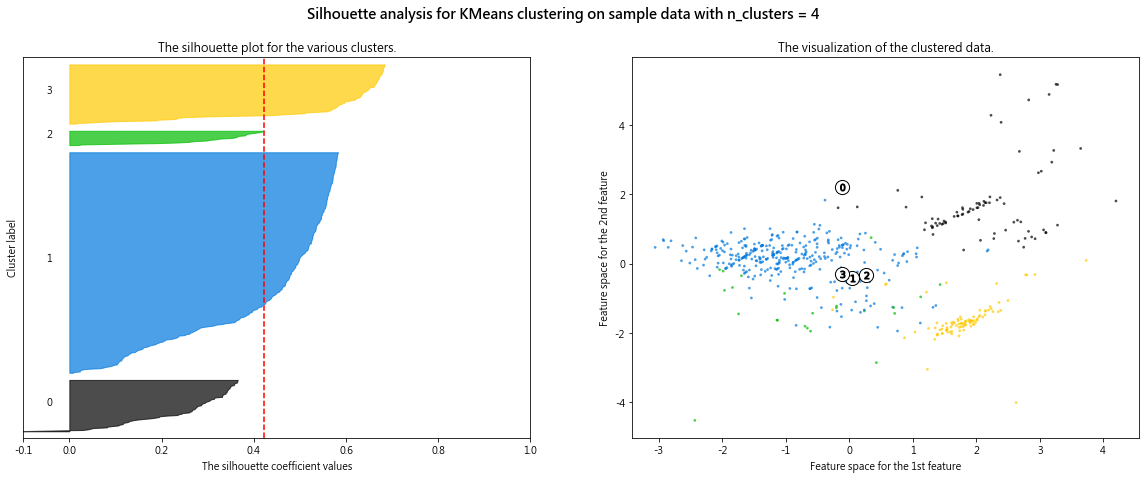

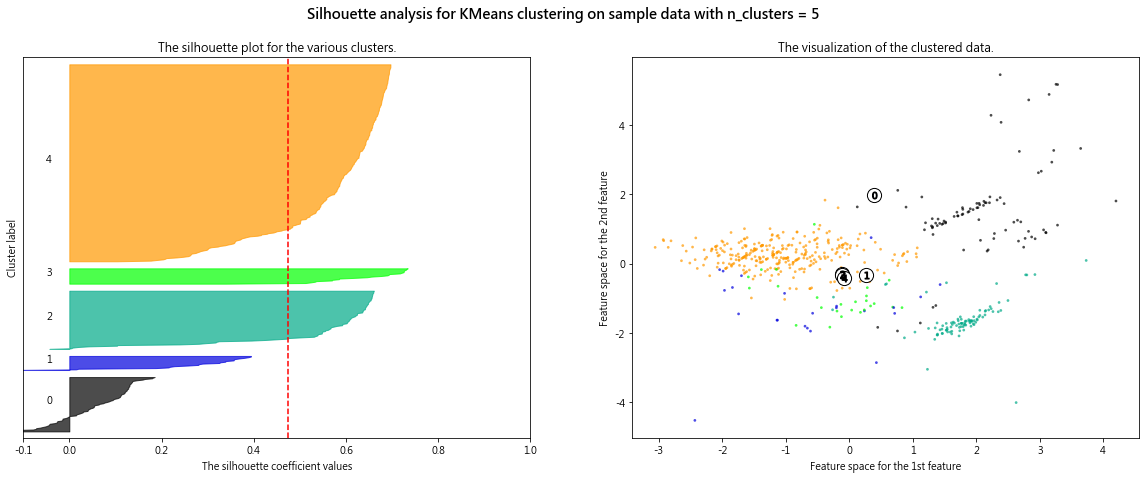

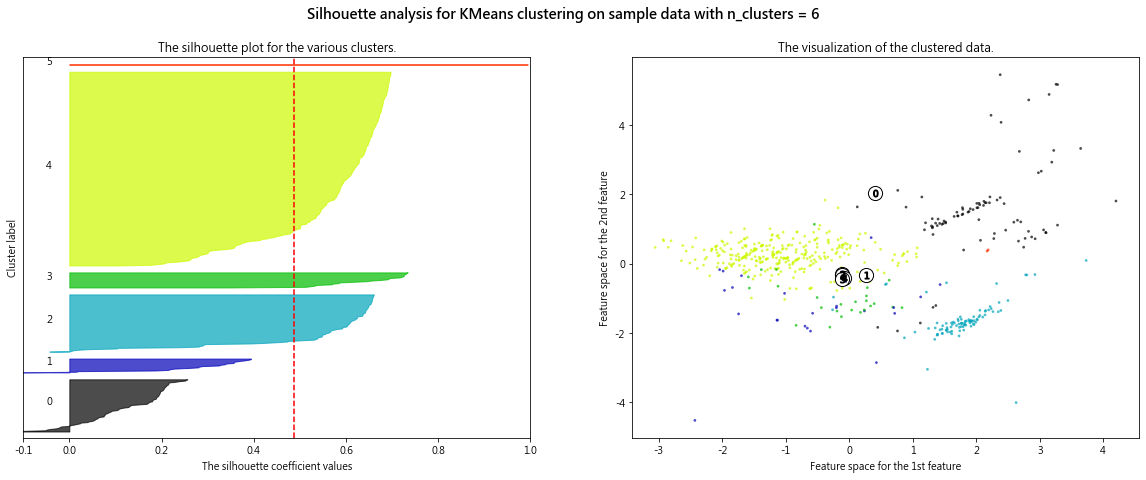

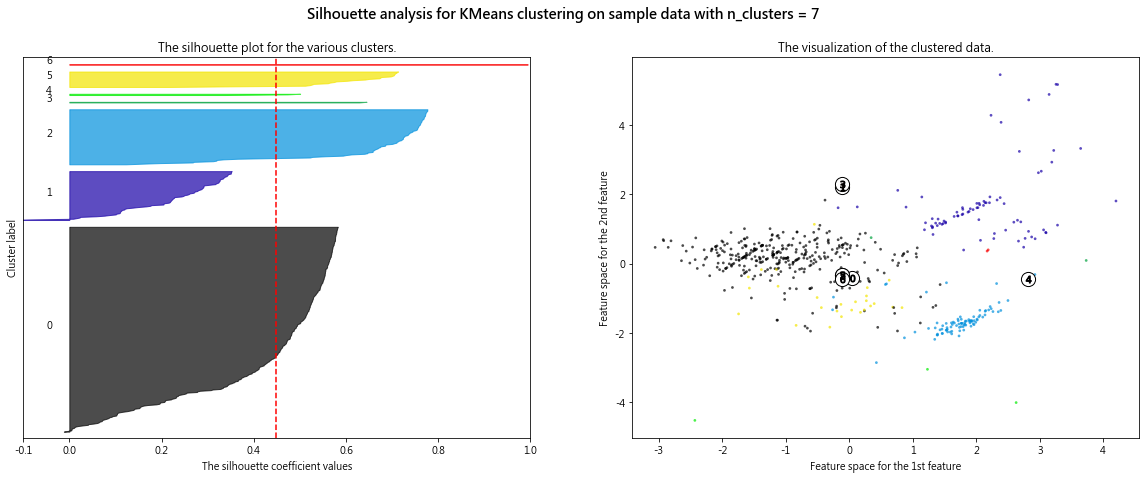

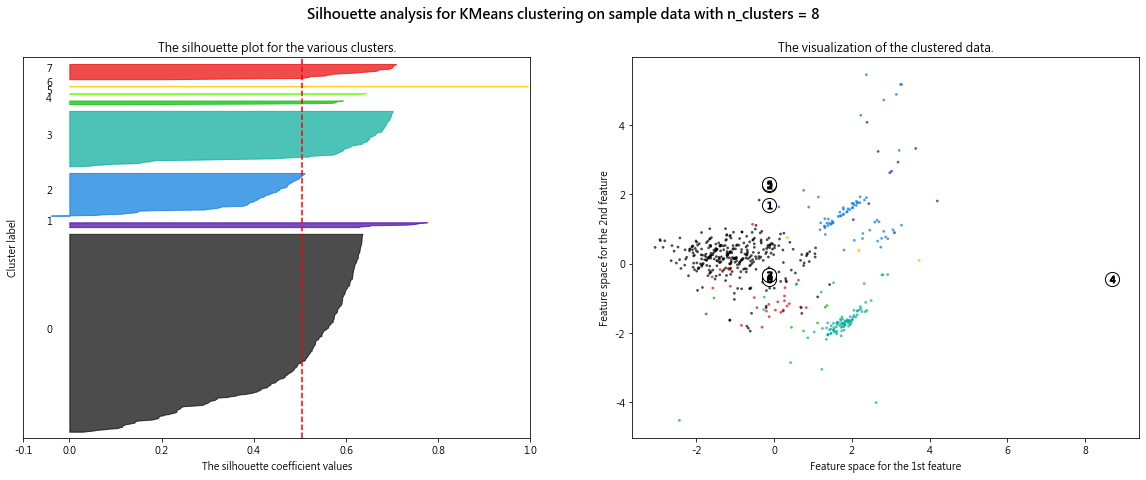

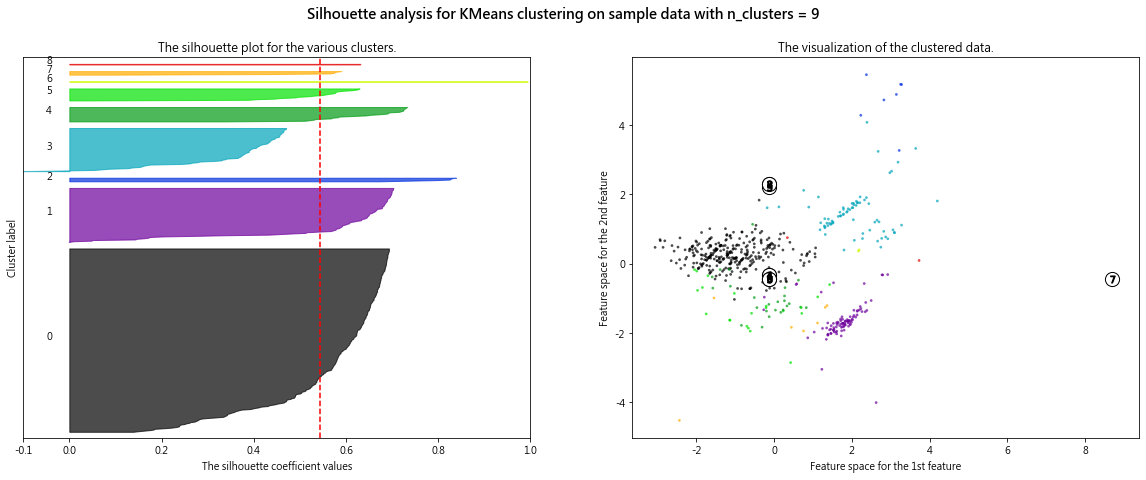

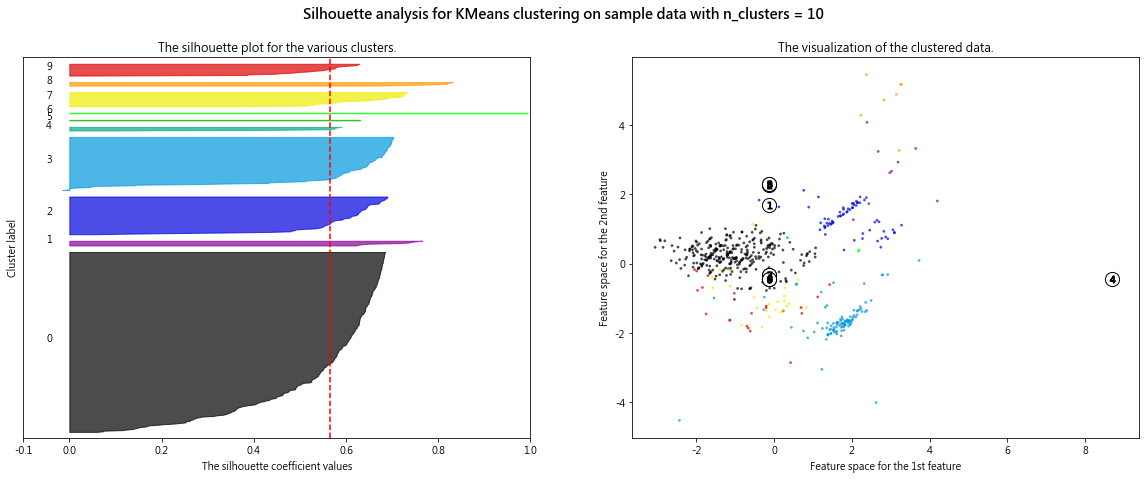

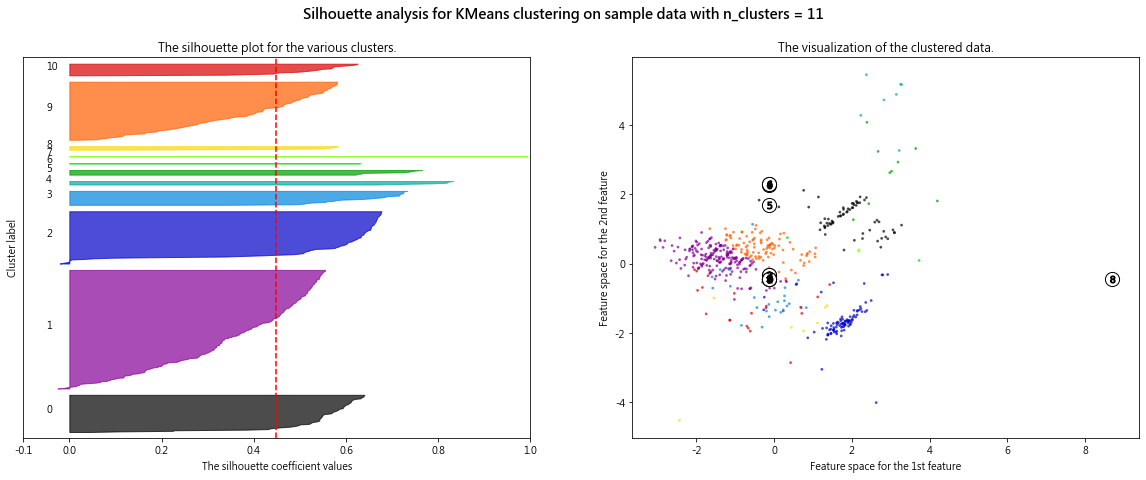

In [16]:
# silhouette_score plot
vs.Silhouette_score(r = 12, df = Insurance_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Insurance_2018'+ '_Silhouette_score' + '.png')

## K Prototype Clustering

In [18]:
Insurance_scaledfeat_w_prop_df = Insurance_scaled_features_df
Insurance_scaledfeat_w_prop_df['Age_bins'] = Insurance_flat['Age_bins']
Insurance_scaledfeat_w_prop_df['Gender'] = Insurance.groupby(['Customer_ID'])['Gender'].first()
Insurance_scaledfeat_w_prop_df['Constellation'] = Insurance.groupby(['Customer_ID'])['Constellation'].first()
Insurance_scaledfeat_w_prop_df['Com_ID'] = Insurance.groupby(['Customer_ID'])['Com_ID'].first()
Insurance_scaledfeat_w_prop_df['Sales_ID'] = Insurance.groupby(['Customer_ID'])['Sales_ID'].first()
Insurance_scaledfeat_w_prop_df.head()

Product_Category,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age,Age_bins,Gender,Constellation,Com_ID,Sales_ID
Customer_ID,,,,,,,,,,,,,,,,,,
A103717610,-0.115142,-0.437526,-0.061256,-0.075094,-0.226010,-0.115142,-0.197033,-0.061256,-0.130806,-0.211948,-0.467630,-1.073100,1.422624,60-69,MALE,天蠍座,585U,4205
A120502113,-0.115142,-0.437526,-0.061256,-0.075094,-0.226010,-0.115142,-1.401201,-0.061256,-0.130806,-0.211948,2.142998,-0.654750,0.014918,40-49,MALE,射手座,5852,91112
A121900382,-0.115142,-0.437526,-0.061256,-0.075094,4.424581,-0.115142,-1.401201,-0.061256,-0.130806,-0.211948,-0.467630,-1.067297,0.285476,40-49,MALE,巨蟹座,5854,90132
A122597969,-0.115142,-0.437526,-0.061256,-0.075094,-0.226010,-0.115142,-0.347293,-0.061256,-0.130806,-0.211948,-0.467630,-1.341791,1.058439,60-69,MALE,摩羯座,585U,82036
A122755416,-0.115142,-0.437526,-0.061256,-0.075094,4.424582,-0.115142,-1.401201,-0.061256,-0.130806,-0.211948,-0.467630,0.998589,0.631781,50-59,MALE,巨蟹座,5854,96086


In [21]:
from kmodes.kprototypes import KPrototypes

# K Prototype Clustering
best_size = 10
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Insurance_scaledfeat_w_prop_df, categorical=[13, 14, 15, 16, 17])
kproto_centers = kproto.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 272, ncost: 3484.113710446902
Run: 1, iteration: 2/100, moves: 67, ncost: 3188.598859977615
Run: 1, iteration: 3/100, moves: 21, ncost: 3177.3084222356697
Run: 1, iteration: 4/100, moves: 13, ncost: 3174.4041496120076
Run: 1, iteration: 5/100, moves: 8, ncost: 3172.4734665210067
Run: 1, iteration: 6/100, moves: 1, ncost: 3172.455052201107
Run: 1, iteration: 7/100, moves: 0, ncost: 3172.455052201107
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids


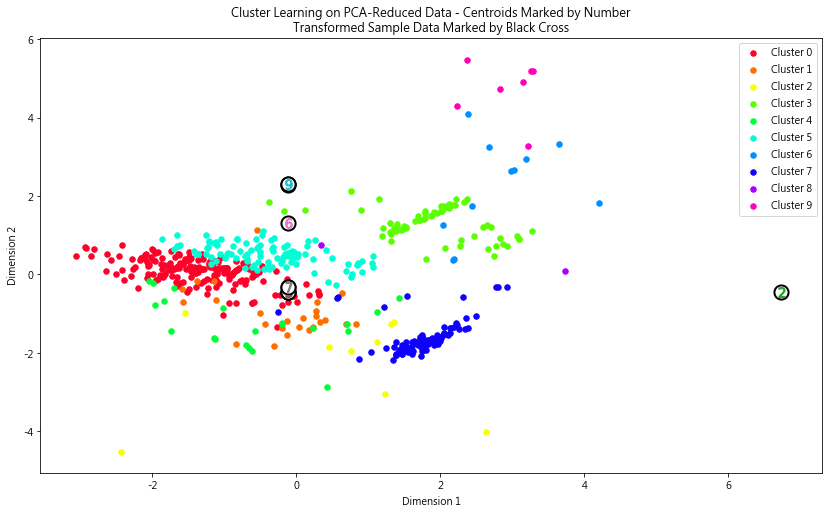

In [22]:
# Plot k prototype
vs.cluster_results(reduced_data, kproto_preds, kproto_centers[0])

## Data Recovery

In [25]:
## K means
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kmeans_centers)
true_centers[np.isnan(true_centers)] = 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = Insurance_scaled_features_df.iloc[:,:13].keys())
true_centers.index = segments
display(true_centers)

# Segment mean
Insurance_flat['Label'] = optimized_kmeans.labels_
display(round(Insurance_flat.groupby('Label').mean()))

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2909: RuntimeWarning: divide by zero encountered in power
  x_inv = (x * lmbda + 1) ** (1 / lmbda)


Product_Category,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age
Segment 0,1.0,1.0,1.0,1.0,1.0,1.0,375219.0,1.0,1.0,1.0,1.0,370319.0,49.0
Segment 1,1.0,459.0,1.0,1.0,1.0,1.0,1025.0,1.0,1.0,1.0,1.0,6196.0,36.0
Segment 2,1.0,10134.0,1.0,1.0,1.0,21.0,4761.0,1.0,1.0,1.0,1.0,29048.0,25.0
Segment 3,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,14080.0,20566.0,45.0
Segment 4,1.0,1.0,1.0,1.0,52599.0,1.0,178.0,1.0,1.0,1.0,1.0,281744.0,50.0
Segment 5,153.0,1.0,1.0,1.0,1.0,1.0,59.0,1.0,1.0,1.0,1.0,64173.0,39.0
Segment 6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,inf,1.0,1.0,1.0,29359.0,17.0
Segment 7,1.0,8.0,1.0,1.0,1.0,1.0,29.0,1.0,inf,1.0,1.0,29264.0,33.0
Segment 8,1.0,1.0,1.0,inf,1.0,1.0,2096.0,1.0,1.0,1.0,2.0,97080.0,43.0
Segment 9,1.0,23407.0,3.0,1.0,1.0,1.0,1290.0,1.0,1.0,1.0,3.0,187021.0,45.0


Product_Category,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age
Label,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,930923.0,1.0,1.0,1.0,113.0,931035.0,48.0
1,1.0,5852.0,1.0,1.0,1.0,1.0,34980.0,1.0,1.0,1.0,1.0,40831.0,35.0
2,1.0,17156.0,1.0,1.0,1.0,595.0,16852.0,1.0,1.0,1.0,3101.0,37703.0,23.0
3,1.0,710.0,1.0,1.0,1.0,1.0,12098.0,1.0,1.0,1.0,22039.0,34845.0,44.0
4,1.0,412.0,1.0,1.0,426168.0,1.0,98530.0,1.0,1.0,1.0,1.0,525109.0,50.0
5,73851.0,1.0,1.0,1.0,1.0,1.0,166802.0,1.0,1.0,1.0,1.0,240653.0,39.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,29368.0,1.0,1.0,1.0,29368.0,17.0
7,1.0,6519.0,1.0,1.0,1.0,1.0,11811.0,1.0,16659.0,1.0,1282.0,36269.0,32.0
8,13036.0,1.0,1.0,26629.0,1.0,1.0,933700.0,1.0,1.0,804851.0,429.0,1778642.0,42.0


In [31]:
## K mode
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kproto_centers[0])
true_centers[np.isnan(true_centers)] = 1
df1 = pd.DataFrame(kproto_centers[1], columns = Insurance_scaledfeat_w_prop_df.iloc[:,[13, 14, 15, 16, 17]].keys())
df2 = pd.DataFrame(np.round(true_centers), columns = Insurance_scaled_features_df.iloc[:,:13].keys())

# Display the true centers
kmeans_centers = 10
segments = ['Segment {}'.format(i) for i in range(0,kmeans_centers)]
true_centers_true = df1.merge(df2, left_index = True, right_index = True)
true_centers_true.index = segments
display(true_centers_true)

# Segment mean
Insurance_flat['Label'] = kproto.labels_
display(round(Insurance_flat.groupby('Label').mean()))

Product_Category,Age_bins,Gender,Constellation,Com_ID,Sales_ID,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age
Segment 0,50-59,FEMALE,雙魚座,585D,86524,1.0,1.0,1.0,1.0,1.0,1.0,535395.0,1.0,1.0,1.0,1.0,529736.0,57.0
Segment 1,40-49,FEMALE,射手座,585H,96160,1.0,1.0,1.0,1.0,52599.0,1.0,178.0,1.0,1.0,1.0,1.0,281744.0,50.0
Segment 2,40-49,FEMALE,水瓶座,585P,91271,1.0,1.0,1.0,1.0,1.0,1.0,225.0,1.0,1.0,1.0,1.0,73798.0,41.0
Segment 3,20-39,FEMALE,天秤座,585Y,95030,1.0,459.0,1.0,1.0,1.0,1.0,1025.0,1.0,1.0,1.0,1.0,6196.0,36.0
Segment 4,40-49,FEMALE,天蠍座,585J,3138,1.0,1.0,1.0,1.0,1.0,1.0,814.0,1.0,1.0,26781.0,1.0,423169.0,50.0
Segment 5,20-39,MALE,射手座,5850,3298,1.0,1.0,1.0,1.0,1.0,1.0,181459.0,1.0,1.0,1.0,1.0,179002.0,32.0
Segment 6,0-19,FEMALE,白羊座,585I,95061,1.0,4.0,1.0,1.0,1.0,1.0,17.0,1.0,1.0,1.0,1.0,29281.0,31.0
Segment 7,40-49,FEMALE,天蠍座,585Z,7025,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,14013.0,19895.0,45.0
Segment 8,20-39,FEMALE,巨蟹座,5850,2046,1.0,23407.0,1.0,1.0,1.0,1.0,1290.0,1.0,1.0,1.0,3.0,187021.0,45.0
Segment 9,0-19,FEMALE,巨蟹座,585I,3160,1.0,10134.0,1.0,1.0,1.0,21.0,4761.0,1.0,1.0,1.0,1.0,29048.0,25.0


Product_Category,Others,保險附約,定期壽險,定期醫療,年金保險,意外傷害,終身壽險,終身還本,終身醫療,萬能壽險,長照險,Buy_Amount,Age
Label,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1180519.0,1.0,1.0,1.0,282.0,1180800.0,57.0
1,1.0,412.0,1.0,1.0,426168.0,1.0,98530.0,1.0,1.0,1.0,1.0,525109.0,50.0
2,53579.0,1.0,1.0,8877.0,1.0,1.0,422435.0,1.0,1.0,268284.0,144.0,753316.0,40.0
3,1.0,5852.0,1.0,1.0,1.0,1.0,34980.0,1.0,1.0,1.0,1.0,40831.0,35.0
4,1.0,1.0,1.0,1.0,6395.0,1.0,341769.0,1.0,1.0,620962.0,1608.0,970731.0,49.0
5,1.0,1.0,1.0,1.0,1.0,1.0,444264.0,1.0,1.0,1.0,1.0,444264.0,31.0
6,1.0,5334.0,1.0,1.0,1.0,1.0,9664.0,5341.0,13630.0,1.0,1049.0,35015.0,29.0
7,1.0,718.0,1.0,1.0,1.0,1.0,9395.0,1.0,1.0,1.0,22032.0,32143.0,44.0
8,1.0,33950.0,11810.0,1.0,1.0,1.0,38769.0,1.0,1.0,498638.0,2196.0,585361.0,44.0


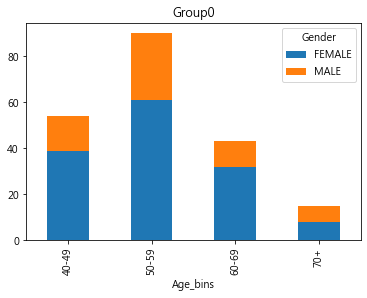

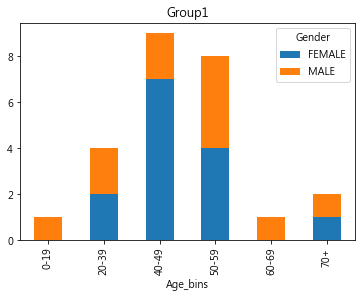

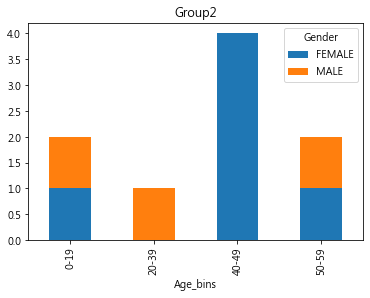

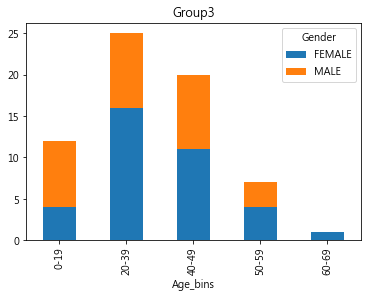

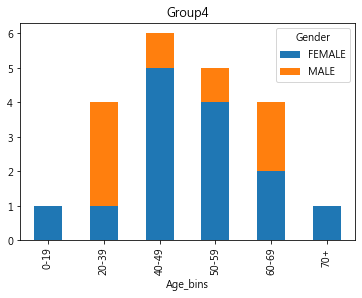

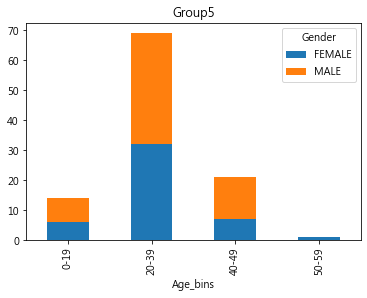

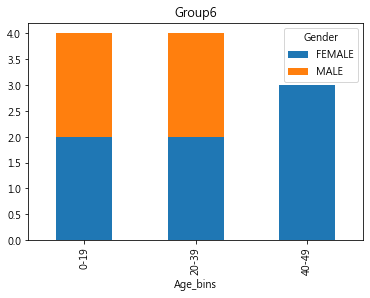

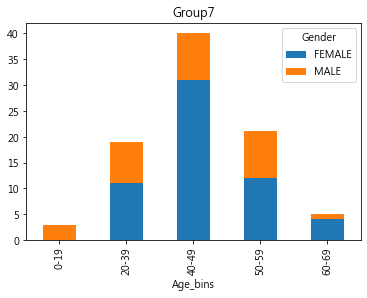

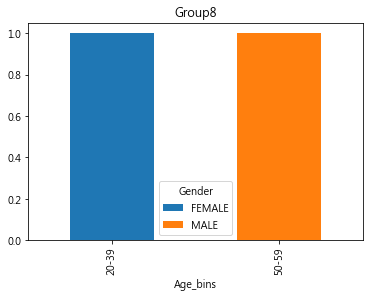

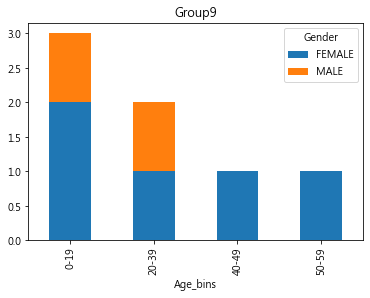

In [32]:
# Plot the Age_Sex features
for tag in np.sort(Insurance_flat['Label'].unique()):
    filter_ = Insurance_flat['Label'] == tag
    ct = pd.crosstab(Insurance_flat[filter_].Age_bins, Insurance_flat[filter_].Gender, margins = False)
    ct.plot.bar(stacked=True)
    plt.title('Group{}'.format(tag))

In [33]:
# Plot the Com_ID_df features
Insurance_scaledfeat_w_prop_df['Label'] = kproto.labels_
for tag in np.sort(Insurance_scaledfeat_w_prop_df['Label'].unique()):
    filter_ = Insurance_scaledfeat_w_prop_df['Label'] == tag
    Com_ID_df = Insurance_scaledfeat_w_prop_df[filter_].groupby('Com_ID').size().to_frame(name = 'Size')
    print('Gp_{}'.format(tag))
    display(Com_ID_df.sort_values(by = 'Size',ascending = False)[:3])

Gp_0


,Size
Com_ID,
585D,22
5855,14
585J,13


Gp_1


,Size
Com_ID,
585H,7
5854,3
585Q,3


Gp_2


,Size
Com_ID,
585P,2
585D,1
585F,1


Gp_3


,Size
Com_ID,
585Y,10
585I,9
585Q,8


Gp_4


,Size
Com_ID,
585J,3
585P,3
585e,3


Gp_5


,Size
Com_ID,
5850,11
585m,9
585b,7


Gp_6


,Size
Com_ID,
585I,2
585Z,2
5850,1


Gp_7


,Size
Com_ID,
585Z,15
5850,11
5852,7


Gp_8


,Size
Com_ID,
5850,1
5857,1


Gp_9


,Size
Com_ID,
585I,2
5850,1
585C,1


In [34]:
# Save Customer list (k mode)
Insurance_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Insurance_2018_Customer_list.xlsx')

## ANOVA test 

In [40]:
# ANOVA test (k means)
import scipy.stats as ss
Insurance_flat_t = Insurance_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Insurance_flat_t.keys():
    samples = [val[1] for val in Insurance_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: Others, F value: 34.476, p value: 0.000
Variable: 保險附約, F value: 74.355, p value: 0.000
Variable: 定期壽險, F value: 88.223, p value: 0.000
Variable: 定期醫療, F value: 47.710, p value: 0.000
Variable: 年金保險, F value: 27.061, p value: 0.000
Variable: 意外傷害, F value: 377.362, p value: 0.000
Variable: 終身壽險, F value: 6.743, p value: 0.000
Variable: 終身還本, F value: 73389.631, p value: 0.000
Variable: 終身醫療, F value: 547.257, p value: 0.000
Variable: 萬能壽險, F value: 25.402, p value: 0.000
Variable: 長照險, F value: 36.525, p value: 0.000
Variable: Buy_Amount, F value: 6.173, p value: 0.000
Variable: Age, F value: 9.378, p value: 0.000
Variable: Label, F value: -240687650936094848.000, p value: nan


In [35]:
# ANOVA test (k mode)
import scipy.stats as ss
Insurance_flat_t = Insurance_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Insurance_flat_t.keys():
    samples = [val[1] for val in Insurance_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: Others, F value: 32.386, p value: 0.000
Variable: 保險附約, F value: 73.326, p value: 0.000
Variable: 定期壽險, F value: 97.652, p value: 0.000
Variable: 定期醫療, F value: 10.831, p value: 0.000
Variable: 年金保險, F value: 29.945, p value: 0.000
Variable: 意外傷害, F value: 425.807, p value: 0.000
Variable: 終身壽險, F value: 10.517, p value: 0.000
Variable: 終身還本, F value: 12.685, p value: 0.000
Variable: 終身醫療, F value: 169.060, p value: 0.000
Variable: 萬能壽險, F value: 23.045, p value: 0.000
Variable: 長照險, F value: 39.482, p value: 0.000
Variable: Buy_Amount, F value: 9.416, p value: 0.000
Variable: Age, F value: 51.037, p value: 0.000
Variable: Label, F value: -267904091744512000.000, p value: nan


In [36]:
# Chi-square for categorical var (k mode)
Insurance_scaledfeat_w_prop_df_chi = Insurance_scaledfeat_w_prop_df.iloc[:,-5:]
Insurance_scaledfeat_w_prop_df_chi['Label'] = kproto.labels_

for Variable in Insurance_scaledfeat_w_prop_df_chi.keys():
    samples = pd.crosstab(index = Insurance_scaledfeat_w_prop_df_chi['Label'], \
                          columns = Insurance_scaledfeat_w_prop_df_chi[Variable])
    chisq, p_val, df, ex = ss.chi2_contingency(samples, correction = False)
    print('Variable: {}, chi value: {:.3f}, p value: {:.3f}'.format(Variable, chisq, p_val))

Variable: Gender, chi value: 21.798, p value: 0.010
Variable: Constellation, chi value: 106.441, p value: 0.287
Variable: Com_ID, chi value: 571.504, p value: 0.000
Variable: Sales_ID, chi value: 3267.568, p value: 0.000
Variable: Label, chi value: 4815.000, p value: 0.000


In [37]:
# Turkey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

writer = pd.ExcelWriter('Insurance_2018_Turkey_HSD_sheets.xlsx', engine='xlsxwriter')
for Variable in Insurance_flat_t.keys():
    Results = pairwise_tukeyhsd(Insurance_flat_t[Variable], Insurance_flat_t['Label'])
    pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])\
    .to_excel(writer, sheet_name = Variable)
writer.save()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
